In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/Zomato-data-.csv')

In [5]:
data.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
data.tail(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [7]:
data.shape

(148, 7)

In [9]:
data.describe(include='all')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148,148.000000,148.000000,148
unique,145,2,2,20,NaN,NaN,4
top,San Churro Cafe,No,No,3.8/5,NaN,NaN,Dining
freq,2,90,140,19,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,264.810811,418.243243,NaN
std,NaN,NaN,NaN,NaN,653.676951,223.085098,NaN
min,NaN,NaN,NaN,NaN,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,NaN,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,NaN,221.750000,600.000000,NaN


In [10]:
data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [11]:
data.dtypes

,0
name,object
online_order,object
book_table,object
rate,object
votes,int64
approx_cost(for two people),int64
listed_in(type),object


## Data Cleaning and Preparation
Before moving further we need to clean and process the data.

1. Convert the rate column to a float by removing denominator characters.

In [14]:
def handlerate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)
data['rate'] = data['rate'].apply(handlerate)

In [15]:
data.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Exploring Restaurant Types

Text(0.5, 0, 'Type of Restaurant')

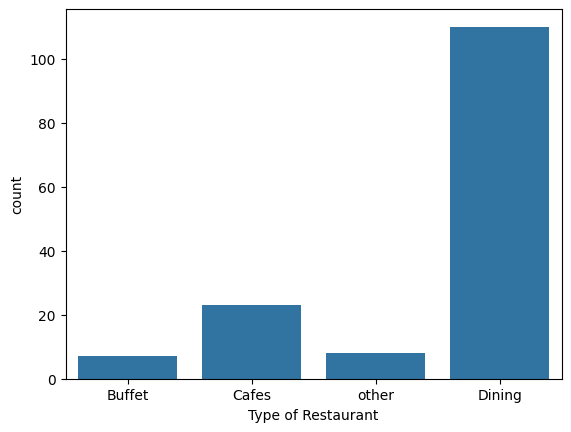

In [18]:
#popular restaurant categories.
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Conclusion: The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

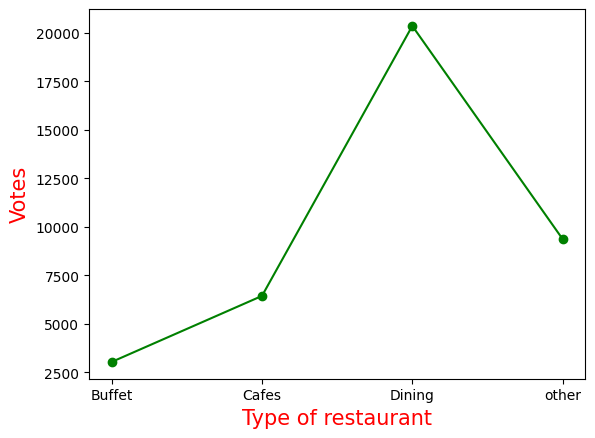

In [24]:
# Votes by restaurant type.
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=15)
plt.ylabel('Votes', c='red', size=15)

 Dining restaurants are preferred by a larger number of individuals.

In [30]:
#Identify the Most Voted Restaurant
max_votes = data['votes'].max()
restaurants_with_max_votes = data.loc[data['votes'] == max_votes,'name']
print(restaurants_with_max_votes)

38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

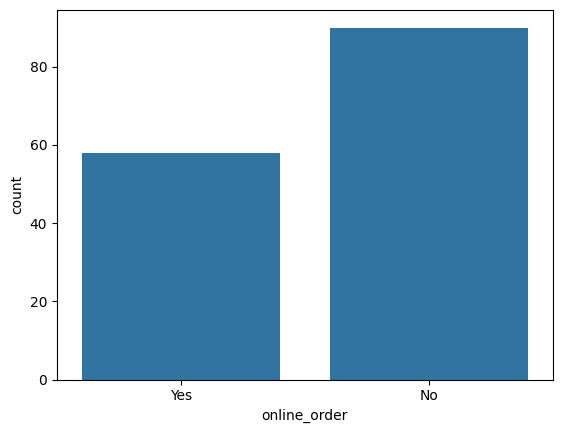

In [31]:
# Online Order Availability.
sns.countplot(x=data['online_order'])

This suggests that a majority of the restaurants do not accept online orders.

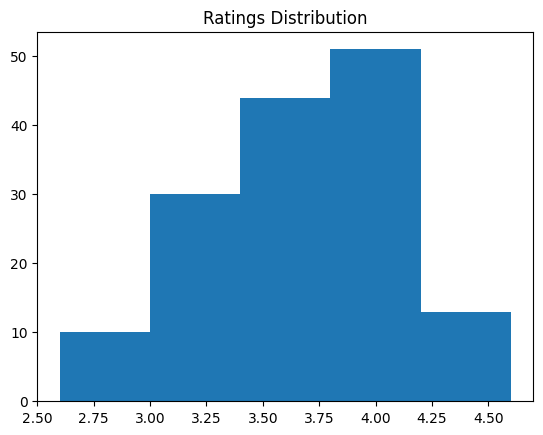

In [33]:
# Analyze Ratings
plt.hist(data['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

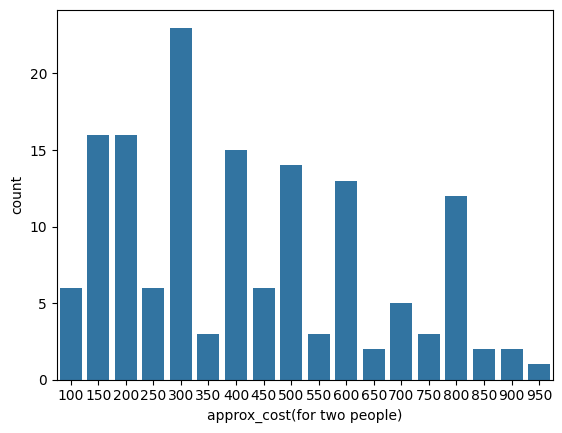

In [35]:
# Approximate Cost for Couples.
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data)

The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

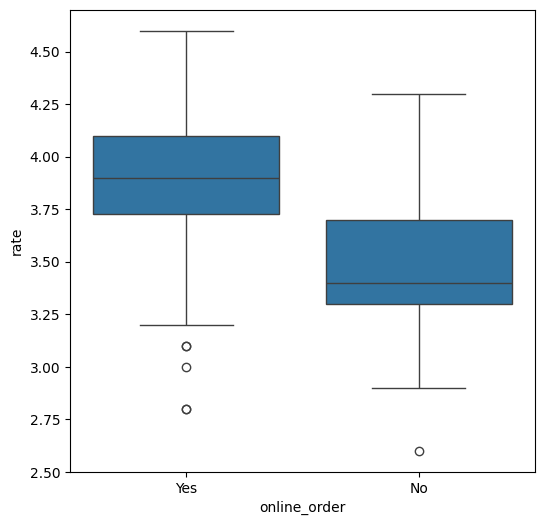

In [36]:
# Ratings Comparison - Online vs Offline Orders.
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data=data)

Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

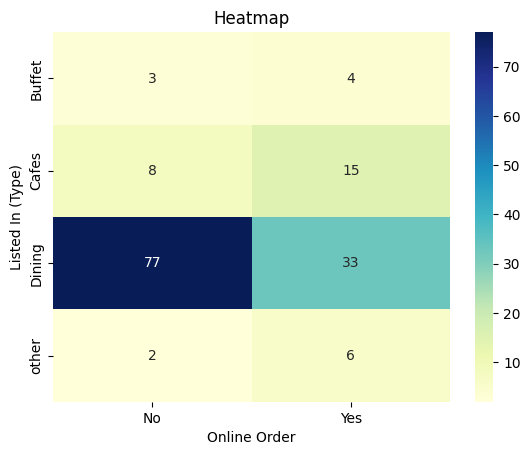

In [37]:
#Order Mode Preferences by Restaurant Type.
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.